<a href="https://colab.research.google.com/github/sachinchauhari479/Assignment/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import operator


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# for removal of warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data="Data_Science_Internship - Dump.csv"

In [ ]:
df=pd.read_csv(data)

In [ ]:
df.head(5)

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [ ]:
df.status.value_counts()

LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [ ]:
df.shape

(46608, 16)

In [ ]:
df.isnull().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

In [ ]:
print(df['room_type'].unique())

[nan 'Ensuite' 'Entire Place' 'Studio' 'Twin-Studio' 'Non-Ensuite']


In [ ]:
print(df['source_country'].value_counts())

e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96    18812
9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0     8641
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2     6999
e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c94f5dc73f4e676333f     2022
38fe804a1f9ec032ad876bd7192c1f706e1402831e163cf72702b1f451f40cac      999
                                                                    ...  
0b6e4801d2a43e3c5dc06d5b68524bd9e80e425610b531d977b5713d59df47b6        1
4a89aa60736d863a5fda8aa2305e299e1c3bea690fe4775363fbf2762102b273        1
b828c41f8b20d533c028d8a4e1019fe0b16bb14d4b7114a662365d08e89a1bea        1
39ae135c41c0e9f97bdbe7449f5320052c6a699cbf0fcbd95dc17f6465f0d34e        1
282a5dbb9d8cb1ea0caf847b5aaca66cf1a76b5e57ddbbd2dd7db8204f553c5c        1
Name: source_country, Length: 186, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


<AxesSubplot:>

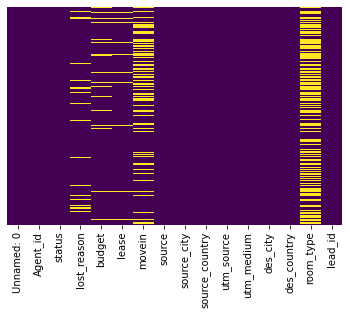

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [ ]:
df.dtypes

Unnamed: 0         int64
Agent_id          object
status            object
lost_reason       object
budget            object
lease             object
movein            object
source            object
source_city       object
source_country    object
utm_source        object
utm_medium        object
des_city          object
des_country       object
room_type         object
lead_id           object
dtype: object

In [ ]:
country_name=df.source_country.value_counts().index

In [ ]:
df.source_country.value_counts()

e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96    18812
9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0     8641
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2     6999
e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c94f5dc73f4e676333f     2022
38fe804a1f9ec032ad876bd7192c1f706e1402831e163cf72702b1f451f40cac      999
                                                                    ...  
0b6e4801d2a43e3c5dc06d5b68524bd9e80e425610b531d977b5713d59df47b6        1
4a89aa60736d863a5fda8aa2305e299e1c3bea690fe4775363fbf2762102b273        1
b828c41f8b20d533c028d8a4e1019fe0b16bb14d4b7114a662365d08e89a1bea        1
39ae135c41c0e9f97bdbe7449f5320052c6a699cbf0fcbd95dc17f6465f0d34e        1
282a5dbb9d8cb1ea0caf847b5aaca66cf1a76b5e57ddbbd2dd7db8204f553c5c        1
Name: source_country, Length: 186, dtype: int64

In [ ]:
country_val=df.source_country.value_counts().values

([<matplotlib.patches.Wedge at 0x1af4f23e640>,
 [Text(-0.006962451123885664, 1.0999779653585555, 'e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96'),
  Text(-0.8144722811142987, -0.7393476200654675, '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'),
  Text(0.5055052685555069, -0.9769669510595663, '8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2'),
  Text(1.0381181394878407, -0.36374541710694325, 'e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c94f5dc73f4e676333f'),
  Text(1.0961442927092653, -0.09202004977669218, '38fe804a1f9ec032ad876bd7192c1f706e1402831e163cf72702b1f451f40cac')],
 [Text(-0.0037977006130285435, 0.5999879811046666, '50.20%'),
  Text(-0.44425760788052654, -0.4032805200357095, '23.06%'),
  Text(0.2757301464848219, -0.5328910642143089, '18.68%'),
  Text(0.5662462579024585, -0.19840659114924175, '5.40%'),
  Text(0.5978968869323265, -0.050192754423650274, '2.67%')])

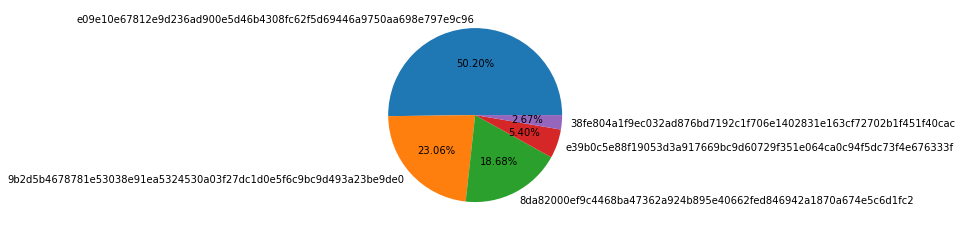

In [ ]:
plt.pie(country_val[:5], labels=country_name[:5], autopct='%1.2f%%')

In [ ]:
source_country_count=df.source_country.value_counts()

In [ ]:
df = df[~df['source_country'].isin(source_country_count[source_country_count == 1].index)]

In [ ]:
df.shape

(46589, 16)

In [ ]:
print(df.source_country.value_counts().index)

Index(['e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96',
       '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',
       '8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2',
       'e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c94f5dc73f4e676333f',
       '38fe804a1f9ec032ad876bd7192c1f706e1402831e163cf72702b1f451f40cac',
       '0207c236c5ad89235d814b1e1807f6fdc1930810439489f76600e1672338e42b',
       'b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf27cee28623bb25bb12',
       'c2863266ba318106a050f6f52c0a0e5ee19bdbacc19c0965979ae9f2b22354c6',
       'e28406d05650a1fab7eb01a80ef73a2e3460a214fe48601b63f93d37a65ab966',
       'cf3a9ac98c81ec1643e418e9647543cff130e4dc0b0b1f8ed8076de51905eaf0',
       ...
       '88bc83148daf504dc727efddbf0d5b8703486f1413ea394aeaf440a41b436700',
       'dec99447cb0e9723a8690c856b07e4f0883aae8d6170c1f4a492605547f98ced',
       '4f89c5f8c2b4b27a84096adff07e21c7878ece8a05425dad6a64e07dee5f96f7',
       '148f81

In [ ]:
df.source_country.value_counts()

e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96    18812
9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0     8641
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2     6999
e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c94f5dc73f4e676333f     2022
38fe804a1f9ec032ad876bd7192c1f706e1402831e163cf72702b1f451f40cac      999
                                                                    ...  
9ae66d359cdd721900122aec113fd8da17a60b983d6da1fbeb631c1b6adfd19c        2
641460416699700bf1df2c3c4bcd6115ada495b43ee2e6b456e399214614b64b        2
b8f54bc9b66bbf1ce92610b08da10d3a15399e3bdfdf6362c2845da99d4e5797        2
487b4cb58717e1373891eb8e58cbd2324f46cd42cc37ab73b210974d0529502e        2
264913c61f74711cfa6fba144d1e8ea877f505b6c92446d9dd30aa3168be3c81        2
Name: source_country, Length: 167, dtype: int64

([<matplotlib.patches.Wedge at 0x1af4e5e7fa0>,
 [Text(-0.006962451123885664, 1.0999779653585555, 'e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96'),
  Text(-0.8144722811142987, -0.7393476200654675, '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'),
  Text(0.5055052685555069, -0.9769669510595663, '8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2'),
  Text(1.0381181394878407, -0.36374541710694325, 'e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c94f5dc73f4e676333f'),
  Text(1.0961442927092653, -0.09202004977669218, '38fe804a1f9ec032ad876bd7192c1f706e1402831e163cf72702b1f451f40cac')],
 [Text(-0.0037977006130285435, 0.5999879811046666, '50.20%'),
  Text(-0.44425760788052654, -0.4032805200357095, '23.06%'),
  Text(0.2757301464848219, -0.5328910642143089, '18.68%'),
  Text(0.5662462579024585, -0.19840659114924175, '5.40%'),
  Text(0.5978968869323265, -0.050192754423650274, '2.67%')])

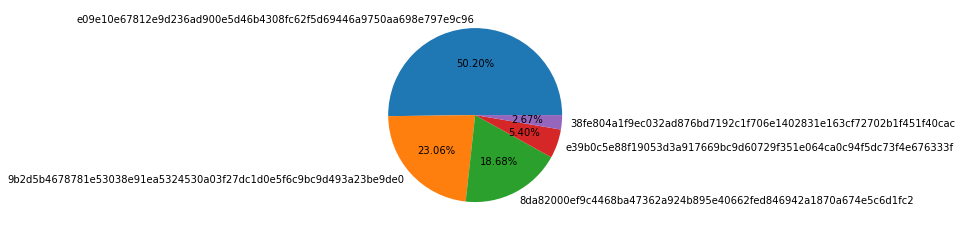

In [ ]:
plt.pie(country_val[:5], labels=country_name[:5], autopct='%1.2f%%')

In [ ]:
df.source_city.value_counts()

9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0    8850
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    3044
b384863fa1f6e091164b74219726eee0b9dd47776b91a4dc71fd0516630d21ec    1441
9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f418c5d76f12d191f02     862
7d1550b844ff586a6023216c06263105eed0a849a2a1f69bb8862ab288d8cdab     761
                                                                    ... 
19020e4c144c370b4c67f70d97cb349c020e349f76b631572367b6a70569f4b0       1
37128ec86f80369f35daa1fed0584835de209c8acd91dc57b4e2fbe06dc618e8       1
aa4c378e5ba1821ad411e525cbba25e440239842fbf869bc256842087811b1c9       1
af748057fa2956d8465363eb298976aed8f477c836b66b7135bae78dadfa1ce5       1
d650065b53c2284b98e575d37e1be820599bf33baff5e147770547a984975d2f       1
Name: source_city, Length: 4319, dtype: int64

In [ ]:
city_name=df.source_city.value_counts().index

In [ ]:
city_val=df.source_city.value_counts().values

([<matplotlib.patches.Wedge at 0x1af4eba2a00>,
 [Text(-0.31238360742477655, 1.0547115633253876, '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'),
  Text(-0.38294422999853817, -1.0311904366851097, 'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7'),
  Text(0.6086998674504729, -0.9162338518990536, 'b384863fa1f6e091164b74219726eee0b9dd47776b91a4dc71fd0516630d21ec'),
  Text(0.9649683505751213, -0.5280493181402, '9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f418c5d76f12d191f02'),
  Text(1.0859796056639905, -0.17506654758086704, '7d1550b844ff586a6023216c06263105eed0a849a2a1f69bb8862ab288d8cdab')],
 [Text(-0.17039105859533263, 0.5752972163593023, '59.17%'),
  Text(-0.2088786709082935, -0.5624675109191506, '20.35%'),
  Text(0.3320181095184397, -0.49976391921766555, '9.63%'),
  Text(0.5263463730409752, -0.2880269008037454, '5.76%'),
  Text(0.5923525121803583, -0.09549084413501838, '5.09%')])

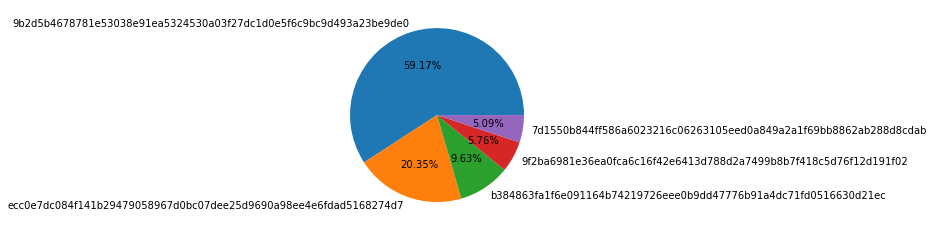

In [ ]:
plt.pie(city_val[:5], labels=city_name[:5], autopct='%1.2f%%')

In [ ]:
df = df[df['status'].isin(['WON', 'LOST'])]

In [ ]:
df.shape

(46299, 16)

In [ ]:
df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan, inplace=True)

In [ ]:
df.head(5)

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [ ]:
# Drop any columns with more than 50% missing values
df.dropna(thresh=df.shape[0]*0.5, axis=1, inplace=True)

In [ ]:
df.shape

(46299, 15)

In [ ]:
df1=df.dropna()

In [ ]:
df1.isnull().sum()

Unnamed: 0        0
Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
movein            0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
lead_id           0
dtype: int64

In [ ]:
df1 = df1.astype('category')

In [ ]:
df1.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
7,7,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
11,11,d4192f06768ab0f257c7f5e17ad021b075b995d4a18675...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,15/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,1f8d4925b8e2af054b06d2ec62e202bae9b4ce53caea34...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,350c5ab8ccefe5621715f9f6e56cb234b62cd4eabce310...
12,12,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,02/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,b1d2dad941873eb0d834c6c8f16f32bcbfbb437956f4e1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,2d664bae493ee238f2f4ee17c91d4f8a0a7eaef64c3d58...
13,13,50750ee66f27656c2b34d43078a064c3b9b8807938b6a3...,LOST,Not responding,£181 - £240 Per Week,Complete Education Year Stay 50 - 52 weeks,04/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,912b4e4c705217bbf4d094839c6e6c2ee7af4328cd9710...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,12a382afc12ec36c5e30b1c95a6093c3f535248f20b701...


In [ ]:
df1.shape

(21004, 15)

In [ ]:
X = df1.drop(['status','Unnamed: 0'], axis=1)
y = df1['status']

In [ ]:
df1['status'] = df1['status'].replace({'LOST': 0, 'WON': 1})

In [ ]:
y = df1['status']

In [ ]:
y.head()

2     0
7     0
11    0
12    0
13    0
Name: status, dtype: category
Categories (1, int64): [0]

In [ ]:
column=['Agent_id', 'lost_reason', 'budget', 'lease',  'movein', 'source', 'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_country', 'lead_id']

In [ ]:
X = pd.get_dummies(X, columns=column)

In [ ]:
X.head()

,Agent_id_04d19fde0a08b17aca69491e714bea43565384d12a63626e08477662cc03780e,Agent_id_06ae80c3e00a1457fc70192d357766c9de0a9787fe3dedc386ac0191e9c151c3,Agent_id_0a8e1918dfba7f1923f23bc135c7b0a76344b632c54ca1584c9938160705f63e,Agent_id_0b31c0155c83c5fdbff532bfe3e43dfe547938df26dd9092df0eb46bd7900b0c,Agent_id_1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050947d659c256d331d34,Agent_id_131127203c89e8219dbdfe2f597538759310f40918b22270401794e1300d2c9d,Agent_id_13990937ab8ca4413751a9012a31255e72a18ba3ac8d5c83dd511df50cf2a3e1,Agent_id_15aefc83749af078486ccde85b7f17f9b40fec0bce7612b1a75910868f7aad2e,Agent_id_16b2de0eb3bafc3b61c8399c6e69bbd699d2228a9c4ada3909efedeaf524c215,Agent_id_18177338c3669a1314d644b7f4ecfd18a5c735e819edf1e2062c3bc354d0dd7f,...,lead_id_ffc2e3386f640c0aa29f2d108a31d4d641bd2054e9f78f30816c7015f4f8501f,lead_id_ffc54ab0e51e06c1747a14bc4a90ff5c24c9f7f6525726454cf7d0d933694b39,lead_id_ffcda4ac8fb5679b79703fce1796e85b7d3a3004b2479c8e6a2ffcdf83d9f81f,lead_id_ffd8b3f45399cdcbf2ad7720583f9187c077d2224329cbfb55a6fed200f9d33d,lead_id_ffdf7224ddda79b25424aa96d087f561bca9c2beaffded7d889780704986663b,lead_id_ffe0d0636acff00ee56039003a7e4f07d50db587e1657a0328158be6a5ef854f,lead_id_ffe7aa8f7a4146e31383bbfab9b3246a1921ec1417fb847ca1727bac63e62cb2,lead_id_fff11aaa4800ce35804a1e557f5ea04d4b7575e31f530398413a1dd111af6216,lead_id_fffdb3c33726791642822022e13ea17b16ddd67312c9abbaa579d80f29cacf92,lead_id_fffe7b465509541da84061c144ca3426748df13497a366adf908eb31adf56119
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (16803, 22473)
y_train shape: (16803,)
X_test shape: (4201, 22473)
y_test shape: (4201,)


In [ ]:
y_train.head()

14647    0
16693    0
41321    0
20926    0
45780    0
Name: status, dtype: category
Categories (1, int64): [0]

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred = rf.predict(X_test)


In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [ ]:
print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1-Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
